### Funções gerais - São utilizadas em mais de uma seção 

Importando as bibliotecas que serão utilizadas ao longo das células

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import scipy 
import random

Funções a serem utilizadas ao longo das celulas

In [2]:
def plot_grafo(G, titulo="Grafo"):
    '''
    Plota um grafo com rótulos de nós e pesos de arestas (se possuir).

    Esta função cria uma visualização de um grafo, exibindo os nós e arestas 
    com os pesos das arestas, se presentes. A disposição dos nós é feita com o layout "spring" 
    do NetworkX.

    Parâmetros:
    -----------
    G : networkx.DiGraph
        O grafo direcionado a ser plotado.
    
    titulo : str, opcional (default="Grafo")
        O título do gráfico exibido.

    Retorno:
    --------
    None
        A função apenas exibe o gráfico do grafo e não retorna nenhum valor.
    '''

    pos = nx.spring_layout(G)

    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edgecolors='black', arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(titulo)
    plt.show()

def gerador_de_grafo(n=10, k=4, p=0.5, seed=42):
    '''
    Gera um grafo não direcionado usando o modelo Watts-Strogatz.

    Esta função cria um grafo pequeno-mundo baseado no modelo Watts-Strogatz, 
    onde os nós são conectados em uma rede com alto grau de agrupamento e um caminho médio pequeno.

    Parâmetros:
    -----------
    n : int, opcional (default=10)
        O número de nós no grafo.
    
    k : int, opcional (default=4)
        O número de vizinhos conectados inicialmente a cada nó. Deve ser menor que `n`.
    
    p : float, opcional (default=0.5)
        A probabilidade de reconectar uma aresta, introduzindo atalhos na rede.
    
    seed : int, opcional (default=42)
        A semente para o gerador de números aleatórios, garantindo reprodutibilidade nos resultados.

    Retorno:
    --------
    Graph : networkx.Graph
        Um grafo não direcionado gerado pelo algoritmo Watts-Strogatz.
    '''

    return nx.connected_watts_strogatz_graph(n=n,k=k,p=p,seed=seed)

def adicionar_pesos_ao_grafo(G, custo_min_aresta=1, custo_max_aresta=5):
    '''
    Adiciona pesos aleatórios às arestas de um grafo.

    Esta função transforma um grafo não direcionado em um grafo direcionado, 
    atribuindo pesos aleatórios a cada aresta, que são gerados dentro de um intervalo 
    especificado.

    Parâmetros:
    -----------
    G : networkx.Graph
        O grafo não direcionado ao qual os pesos serão adicionados.
    
    custo_min_aresta : int, opcional (default=1)
        O valor mínimo do peso de uma aresta.
    
    custo_max_aresta : int, opcional (default=5)
        O valor máximo do peso de uma aresta.

    Retorno:
    --------
    DiGraph : networkx.DiGraph
        Um grafo direcionado onde as arestas possuem pesos aleatórios 
        dentro do intervalo especificado.
    '''
    G_dir = nx.DiGraph()

    for u, v in G.edges():
        peso = random.randint(custo_min_aresta, custo_max_aresta)
        G_dir.add_edge(u, v, weight=peso)
        G_dir.add_edge(v, u, weight=peso)  

    return G_dir

### 1. Gerando grafos simples e conexos com n=10, n=50 e n=100 (n corresponde ao numero de vétices) 

Gerando cada grafo para n=10, n=50 e n=100

In [3]:
GRAFOS_GERADOS = [
    gerador_de_grafo(n=10), 
    gerador_de_grafo(n=50), 
    gerador_de_grafo(n=100)
]

Exibindo cada grafo gerado

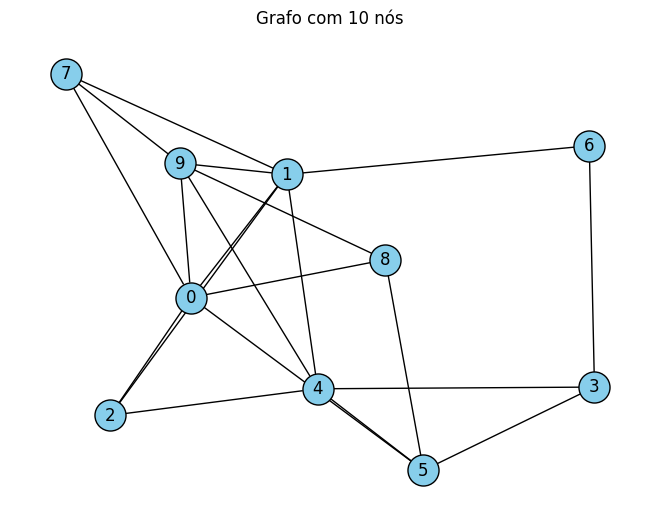

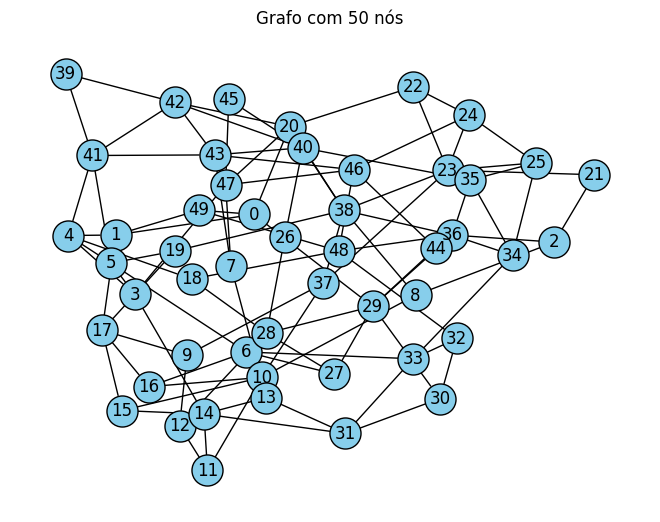

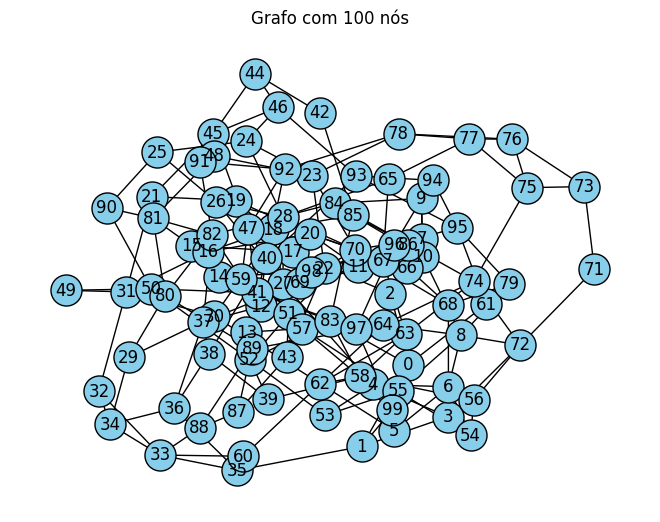

In [4]:
for GRAFO in GRAFOS_GERADOS:
    plot_grafo(GRAFO, f'Grafo com {len(GRAFO.nodes)} nós')

### 2. Gerando a matriz de adjacencia dos grafos 

Obtendo a matriz adjacente de cada grafo

In [5]:
adj_matrixes = [nx.adjacency_matrix(GRAFO) for GRAFO in GRAFOS_GERADOS]

Exibindo elas 

In [6]:
for adj_matrix in adj_matrixes:
    print(f"Exibindo a matriz de adjacencia para n={adj_matrix.shape[0]}")
    display(pd.DataFrame(adj_matrix))

Exibindo a matriz de adjacencia para n=10


,0,1,2,3,4,5,6,7,8,9
0,0,1,1,0,0,1,0,1,1,1
1,1,0,1,0,1,0,1,1,0,1
2,1,1,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0
4,0,1,1,1,0,1,0,0,0,1
5,1,0,0,1,1,0,0,0,1,0
6,0,1,0,1,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,1
8,1,0,0,0,0,1,0,0,0,1
9,1,1,0,0,1,0,0,1,1,0


Exibindo a matriz de adjacencia para n=50


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exibindo a matriz de adjacencia para n=100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 3. Gerar aleatoriamente a matriz de custo, com entradas de números inteiros, das arestas pertencentes a [1,5]

Agora iremos adicionar custos de 1 a 5 as arestas do grafo

In [7]:
grafos_com_pesos = [adicionar_pesos_ao_grafo(GRAFO,custo_min_aresta=1,custo_max_aresta=5) for GRAFO in GRAFOS_GERADOS]

Construindo as matrizes de custos

In [8]:
def gerar_matriz_de_custo(G):
    # Obter o número de nós no grafo
    n = G.number_of_nodes()
    
    # Inicializar uma matriz n x n com valores infinitos (sem ligação entre os nós)
    matriz_custo = np.full((n, n), np.inf)
    
    # Preencher a matriz com os pesos das arestas
    for (u, v, dados) in G.edges(data=True):
        matriz_custo[u, v] = dados.get('weight', 1)  # Se não houver peso, usar o padrão 1
    
    return matriz_custo

matrizes_de_custos = [gerar_matriz_de_custo(grafo_com_peso) for grafo_com_peso in grafos_com_pesos]

Exibindo as matrizes:

In [9]:
for matriz_de_custo in matrizes_de_custos:
    print(f"Exibindo a matriz de custo para n={matriz_de_custo.shape[0]}")
    display(pd.DataFrame(matriz_de_custo))

Exibindo a matriz de custo para n=10


,0,1,2,3,4,5,6,7,8,9
0,inf,1.0,2.0,inf,inf,5.0,inf,2.0,4.0,2.0
1,1.0,inf,1.0,inf,3.0,inf,4.0,1.0,inf,5.0
2,2.0,1.0,inf,inf,1.0,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,4.0,5.0,5.0,inf,inf,inf
4,inf,3.0,1.0,4.0,inf,4.0,inf,inf,inf,2.0
5,5.0,inf,inf,5.0,4.0,inf,inf,inf,5.0,inf
6,inf,4.0,inf,5.0,inf,inf,inf,inf,inf,inf
7,2.0,1.0,inf,inf,inf,inf,inf,inf,inf,3.0
8,4.0,inf,inf,inf,inf,5.0,inf,inf,inf,5.0
9,2.0,5.0,inf,inf,2.0,inf,inf,3.0,5.0,inf


Exibindo a matriz de custo para n=50


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,inf,5.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.0
1,5.0,inf,inf,inf,2.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,2.0
2,inf,inf,inf,inf,inf,inf,inf,inf,5.0,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,1.0,3.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,1.0,inf,inf
4,inf,2.0,inf,1.0,inf,3.0,inf,inf,inf,inf,...,inf,4.0,inf,inf,inf,inf,inf,inf,inf,inf
5,inf,inf,inf,3.0,3.0,inf,1.0,inf,inf,inf,...,inf,5.0,inf,inf,inf,inf,inf,inf,inf,inf
6,inf,inf,inf,inf,inf,1.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
7,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,4.0,inf,inf,inf,5.0,inf,inf
8,inf,inf,5.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
9,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


Exibindo a matriz de custo para n=100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,inf,3.0,1.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,2.0
1,3.0,inf,inf,3.0,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,4.0
2,1.0,inf,inf,inf,inf,inf,inf,5.0,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,3.0,inf,inf,4.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,inf,inf,inf,4.0,inf,3.0,1.0,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,2.0,2.0,inf,2.0,inf,inf,inf
96,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,4.0,2.0,inf,4.0,1.0,inf
97,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,4.0,inf,inf,4.0
98,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,1.0,inf,inf,inf


### 4. Implementar os algoritmos em grafos 

Por fim, vamos aplicar o método de Floyd-Warshall para encontrar os menores caminhos possiveis entre cada vertice

IMPLEMENTAÇÃO SEGUINDO O PSEUDOCÓDIGO:

```plaintext
função floyd_warshall(grafo):
    # Número de vértices no grafo
    n = comprimento(grafo)

    # Inicializa a matriz de distâncias
    dist = matriz(n, n, ∞)  # Cria uma matriz n x n preenchida com ∞

    # Define a distância de cada vértice para si mesmo como 0
    para cada vértice i de 0 a n-1:
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    para cada vértice i de 0 a n-1:
        para cada vértice j de 0 a n-1:
            se grafo[i][j] ≠ 0:
                dist[i][j] = grafo[i][j]

    # Algoritmo de Floyd-Warshall
    para cada vértice k de 0 a n-1:
        para cada vértice i de 0 a n-1:
            para cada vértice j de 0 a n-1:
                # Atualiza a distância mínima
                dist[i][j] = mínimo(dist[i][j], dist[i][k] + dist[k][j])

    retornar dist


In [10]:
def floyd_warshall(G):
    '''
    Implementa o algoritmo de Floyd-Warshall para encontrar o menor caminho entre todos os pares de nós.

    Parâmetros:
    -----------
    G : networkx.DiGraph
        O grafo direcionado em que os pesos das arestas são considerados.

    Retorno:
    --------
    dist : list
        Matriz de distâncias, onde dist[i][j] é a menor distância do nó i para o nó j.
    '''
    
    # Obtém a matriz de adjacência como uma matriz densa (NumPy array)
    graph = nx.to_numpy_array(G)

    # Número de vértices no grafo
    n = len(graph)
    
    # Inicializa a matriz de distâncias
    dist = [[float('inf')] * n for _ in range(n)]
    
    # Define a distância de cada vértice para si mesmo como 0
    for i in range(n):
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    for i in range(n):
        for j in range(n):
            if graph[i, j] != 0:  # Acessa elementos da matriz densa
                dist[i][j] = graph[i, j]

    # Algoritmo de Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Atualiza a distância mínima
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

Definiremos tambem uma função que ira exibir o menor custo de um vértice para outro

In [11]:
def print_menor_custo_caminho(results, vertice_origem=None, vertice_destino=None):
    try: 
        if vertice_origem is None and  vertice_destino is None:
            vertice_origem = int(input('Digite o vértice de origem: '))
            vertice_destino = int(input('Digite o vértice de destino: '))
        print(f'O menor caminho do vertice {vertice_origem} para o vertice {vertice_destino} é de custo = {results[vertice_origem][vertice_destino]}')
    except:
        print('Não foi possível printar o menor caminho entre dois vertices, pois nao foram definidos os vertices')

Aplicando um exemplo, com os grafos gerados com n=10, n=50, n=100.

In [12]:
# Exemplo com os grafos gerados :

# GRAFO N=10
results = floyd_warshall(GRAFOS_GERADOS[0])
print_menor_custo_caminho(results, vertice_origem=5, vertice_destino=7)

# GRAFO N=50
results = floyd_warshall(GRAFOS_GERADOS[1])
print_menor_custo_caminho(results, vertice_origem=5, vertice_destino=7)

# GRAFO N=100
results = floyd_warshall(GRAFOS_GERADOS[2])
print_menor_custo_caminho(results, vertice_origem=0, vertice_destino=99)

O menor caminho do vertice 5 para o vertice 7 é de custo = 2.0
O menor caminho do vertice 5 para o vertice 7 é de custo = 3.0
O menor caminho do vertice 0 para o vertice 99 é de custo = 1.0


### 5. Analisar a complexidade do   


#### Complexidade de Tempo
O algoritmo de Floyd-Warshall usa três laços aninhados para calcular as distâncias mínimas entre todos os pares de nós em um grafo. Cada laço percorre n vértices, resultando em n * n * n = n^3 iterações. Portanto, a complexidade de tempo é O(n^3).
Motivo: Os três laços aninhados fazem o algoritmo percorrer todos os pares de nós e verificar todas as combinações possíveis de caminhos intermediários.

In [13]:
try:
    for k in range(n):          # Laço 1 - percorre o nó intermediário k
        for i in range(n):      # Laço 2 - percorre o nó de origem i
            for j in range(n):  # Laço 3 - percorre o nó de destino j
                # Atualiza a distância mínima entre i e j via k
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])  # resultando em n * n * n = n^3 iterações = O(n^3)
except Exception as e:
    print("CODIGO EXEMPLO")
    print(f"Erro: {e}")

CODIGO EXEMPLO
Erro: name 'n' is not defined


####  Complexidade de Espaço
O algoritmo utiliza uma matriz de adjacência e uma matriz de distâncias, ambas com tamanho n x n. Assim, a complexidade de espaço é O(n^2).
Motivo: É necessário armazenar as distâncias mínimas entre cada par de nós, o que exige n^2 espaços de memória.

In [14]:
try:
    # Inicializa a matriz de distâncias (n x n)
    dist = [[float('inf')] * n for _ in range(n)]  # O(n^2) espaço
    for i in range(n):
        dist[i][i] = 0
except Exception as e:
    print("CODIGO EXEMPLO")
    print(f"Erro: {e}")

CODIGO EXEMPLO
Erro: name 'n' is not defined


### 6. Fazer interfaces mostrando:

#### 6.1. Apresentação geometrica dos grafos


Ja foi feito ! 

#### 6.2. Apresentação das melhores rotas


Fazendo a funcão que plota essa melhor rota apartir dos pontos destacados.

In [15]:
def encontrar_caminho_minimo(dist, origem, destino, G):
    """
    Encontra o caminho mínimo entre dois vértices usando a matriz de distâncias
    e o grafo original para reconstruir o caminho.

    Parâmetros:
    -----------
    dist : list
        Matriz de distâncias retornada pelo algoritmo de Floyd-Warshall.
    origem : int
        Vértice de origem.
    destino : int
        Vértice de destino.
    G : networkx.Graph
        O grafo original.

    Retorno:
    --------
    caminho : list
        Lista de nós que representam o caminho mínimo.
    """
    caminho = []
    current = origem

    while current != destino:
        caminho.append(current)
        # Encontra o próximo nó no caminho
        for neighbor in G.neighbors(current):
            if dist[current][neighbor] + dist[neighbor][destino] == dist[current][destino]:
                current = neighbor
                break
    caminho.append(destino)
    return caminho

def plotar_grafo_com_caminho(G, caminho, titulo="Grafo com Caminho Mínimo"):
    """
    Plota o grafo e destaca o caminho mínimo.

    Parâmetros:
    -----------
    G : networkx.Graph
        O grafo a ser plotado.
    caminho : list
        Lista de nós que representam o caminho a ser destacado.
    titulo : str, opcional (default="Grafo com Caminho Mínimo")
        O título do gráfico exibido.

    Retorno:
    --------
    None
    """
    pos = nx.spring_layout(G)

    # Desenha o grafo
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edgecolors='black', arrows=True)

    # Destaca o caminho
    for i in range(len(caminho) - 1):
        nx.draw_networkx_edges(G, pos, edgelist=[(caminho[i], caminho[i + 1])], width=2, edge_color='red')

    # Adiciona rótulos de arestas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(titulo)
    plt.show()

Aplicando um exemplo, com os grafos gerados com n=10, n=50, n=100.

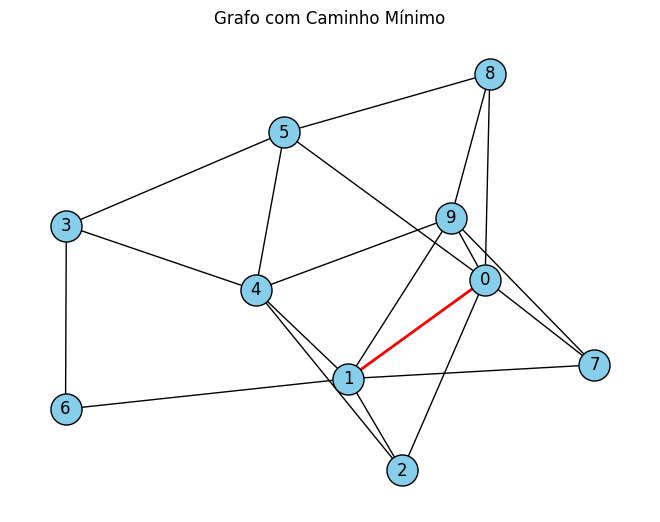

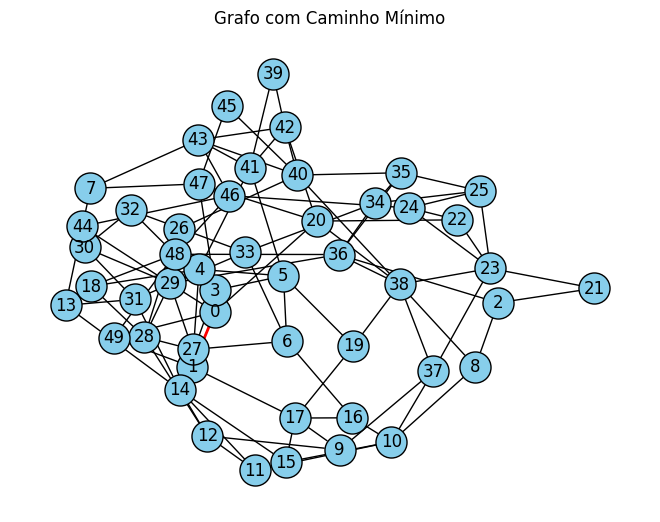

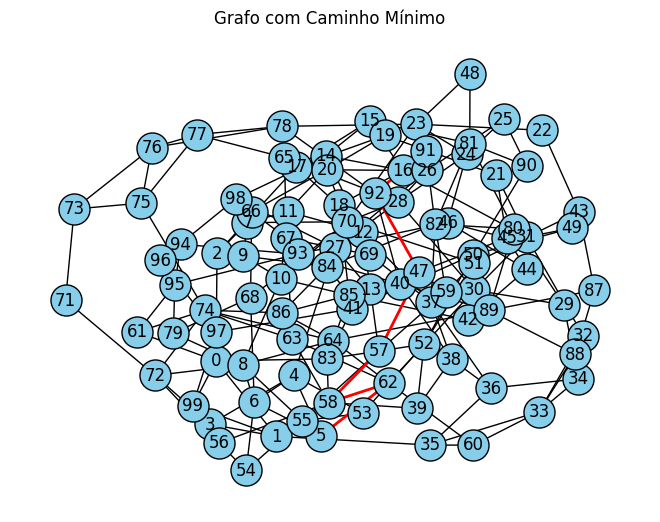

In [16]:
# Exemplo com os grafos gerados :

# GRAFO N=10
results = floyd_warshall(GRAFOS_GERADOS[0])
caminho_minimo = encontrar_caminho_minimo(results, origem=0, destino=1, G=GRAFOS_GERADOS[0])
plotar_grafo_com_caminho(GRAFOS_GERADOS[0], caminho_minimo)

# GRAFO N=50
results = floyd_warshall(GRAFOS_GERADOS[1])
caminho_minimo = encontrar_caminho_minimo(results, origem=0, destino=1, G=GRAFOS_GERADOS[1])
plotar_grafo_com_caminho(GRAFOS_GERADOS[1], caminho_minimo)

# GRAFO N=100
results = floyd_warshall(GRAFOS_GERADOS[2])
caminho_minimo = encontrar_caminho_minimo(results, origem=91, destino=5, G=GRAFOS_GERADOS[2])
plotar_grafo_com_caminho(GRAFOS_GERADOS[2], caminho_minimo)


### 7. Estudo a cerca do grafo do artigo selecionado

Construindo a matriz de adjacencia a partir do grafo do artigo

In [17]:
# Número de vértices no grafo (nós de 1 a 15)
num_vertices = 15

# Inicializando a matriz de adjacência com zeros (sem arestas inicialmente)
adj_matrix = np.zeros((num_vertices, num_vertices))

# Definindo as arestas conforme a imagem (baseado nos pesos fornecidos)
vertices = [
    (1,  2,  170), 
    (1,  3,  16), 
    (1,  4,  25),
    (2,  3,  50),
    (3,  4,  40), 
    (3,  6,  60),
    (4,  5,  40),
    (5,  6,  60), 
    (5,  11, 20),
    (6,  7,  60), 
    (6,  10, 80),
    (7,  8,  80),
    (8,  9,  70),
    (9,  10, 80), 
    (9,  13, 70),
    (10, 12, 120),
    (11, 12, 30),
    (12, 14, 120),
    (13, 15, 70), 
    (14, 15, 70)
]

# Preenchendo a matriz com os pesos das arestas
for vertice in vertices:
    u, v, peso = vertice
    adj_matrix[u-1, v-1] = peso  # Subtraímos 1 pois os índices de matriz começam em 0
    adj_matrix[v-1, u-1] = peso  # A matriz é simétrica para um grafo não direcionado

Transformando em pd.Dataframe e salvando a matriz de adjacencia em .csv

In [18]:
df = pd.DataFrame(adj_matrix)
df.to_csv('artigo_de_estudo/matriz_adjacente.csv')

display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,170.0,16.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,170.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,50.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0.0,40.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
5,0.0,0.0,60.0,0.0,60.0,0.0,60.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,60.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,80.0,0.0,0.0,70.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,80.0,0.0,0.0,120.0,0.0,0.0,0.0


O tipo de dados que iremos trabalhar no NetworkX é o `DiGraph`.

In [19]:
G = nx.DiGraph(df)

Para realizar a plotagem do grafo usaremos a função `plot_grafo()`

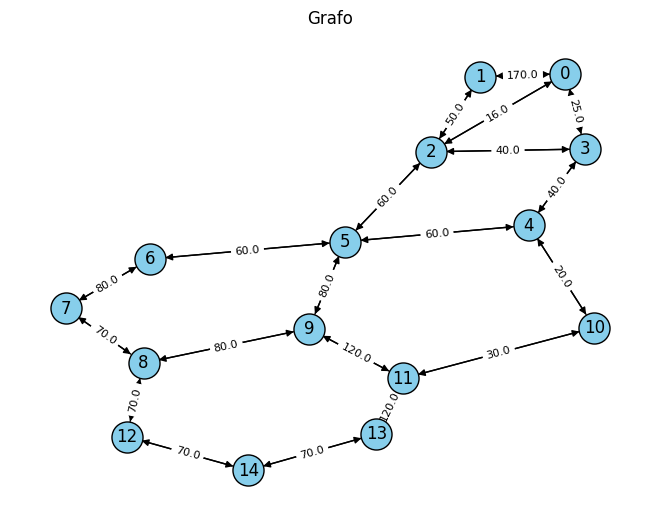

In [20]:
plot_grafo(G)

Aplicando floyd-warshall em G e exemplificando o custo para 0 a 1

O menor caminho do vertice 0 para o vertice 11 é de custo = 115.0


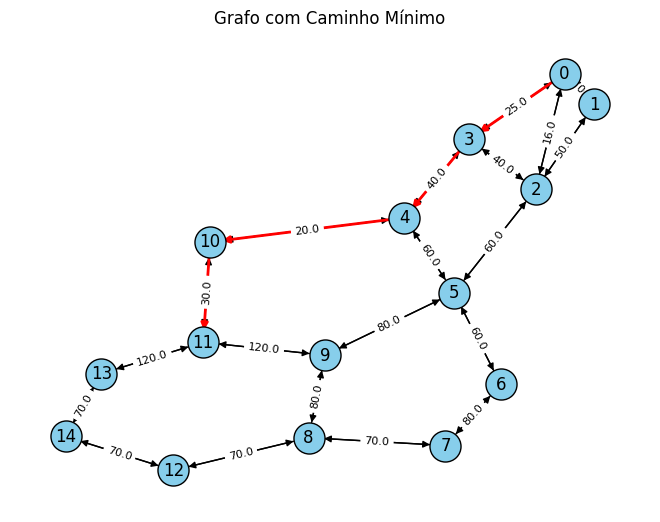

In [21]:
origem = 0
destino = 11
results = floyd_warshall(G)
print_menor_custo_caminho(results, vertice_origem=origem, vertice_destino=destino)
caminho_minimo = encontrar_caminho_minimo(results, origem=origem, destino=destino, G=G)
plotar_grafo_com_caminho(G, caminho_minimo)